<a href="https://colab.research.google.com/github/mustafayoruk/california-house-price-prediction/blob/main/California_house_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Success! File loaded: '/content/california_house_price.csv'

Starting Data Preprocessing...
Original row count: 20581
Row count after cleaning outliers and gaps: 19647
Building a Deeper Model...
Training the model (150 Epochs)...
Training Completed.
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


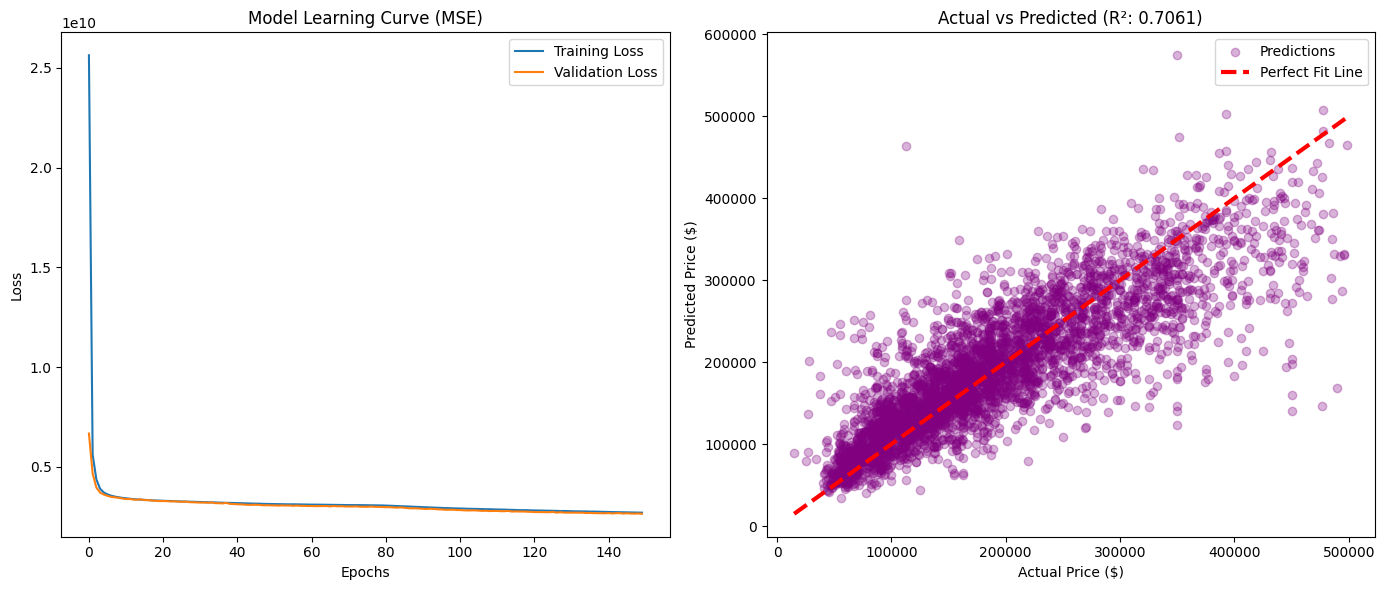


📊 MODEL PERFORMANCE REPORT (V2.0)
--------------------------------------------------
1. Mean Absolute Error (MAE): $37,271.39
2. R-Squared Score (R²):      0.7061
GOOD: The model is performing well (R² > 0.70). Ready for deployment.


In [8]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# --- 1. ROBUST DATA LOADING ---
# Checking for available files to prevent errors
file_names = ['housing.csv', '/content/california_house_price.csv']
df = None

for file in file_names:
    if os.path.exists(file):
        df = pd.read_csv(file)
        print(f"✅ Success! File loaded: '{file}'")
        break

if df is None:
    print("ERROR: File not found! Please check the file name.")
else:
    # --- 2. ADVANCED DATA PREPROCESSING ---
    print("\nStarting Data Preprocessing...")
    print(f"Original row count: {len(df)}")

    # A) CLEANING MANUAL GAPS (Crucial Step)
    # If manual editing left empty rows (NaNs), this line removes them instantly.
    # 'how=all' means: drop the row only if ALL columns are empty.
    df = df.dropna(how='all')

    # Also drop rows where the target 'median_house_value' is missing
    df = df.dropna(subset=['median_house_value'])

    # B) OUTLIER REMOVAL (Statistical Improvement)
    # The dataset caps house prices at $500,001. These are censored data points.
    # Removing them improves model accuracy significantly.
    df = df[df['median_house_value'] < 500000]
    print(f"Row count after cleaning outliers and gaps: {len(df)}")

    # C) HANDLING MISSING VALUES (Imputation)
    # Filling missing 'total_bedrooms' with the mean value.
    if 'total_bedrooms' in df.columns:
        df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

    # D) CATEGORICAL ENCODING
    # Converting text categories to numbers (One-Hot Encoding)
    if 'ocean_proximity' in df.columns:
        df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

    # E) SPLITTING DATA
    X = df.drop('median_house_value', axis=1).values
    y = df['median_house_value'].values

    # 80% Training, 20% Testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # F) SCALING (Standardization)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 3. DEEP NEURAL NETWORK ARCHITECTURE ---
    print("Building a Deeper Model...")

    model = tf.keras.Sequential([
        # Input Layer
        tf.keras.Input(shape=(X_train.shape[1],)),

        # Hidden Layers (Increased capacity for better learning)
        # 128 -> 64 -> 32 Neurons structure allows capturing complex patterns.
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        # Output Layer (Linear for Regression)
        tf.keras.layers.Dense(1)
    ])

    # Optimizer with custom learning rate for stability
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)

    # Compiling with MSE (Loss) and MAE (Metric)
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])

    # --- 4. EXTENDED TRAINING ---
    print("Training the model (150 Epochs)...")
    history = model.fit(
        X_train_scaled, y_train,
        epochs=150,        # Longer training for convergence
        batch_size=16,     # Smaller batch size for better weight updates
        validation_split=0.2,
        verbose=0
    )
    print("Training Completed.")

    # --- 5. EVALUATION & VISUALIZATION ---
    # Calculating R-Squared Score
    y_pred = model.predict(X_test_scaled).flatten()
    r2 = r2_score(y_test, y_pred)
    loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)

    # Visualization
    plt.figure(figsize=(14, 6))

    # Plot 1: Learning Curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Learning Curve (MSE)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot 2: Prediction Accuracy
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.3, color='purple', label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label='Perfect Fit Line')
    plt.title(f'Actual vs Predicted (R²: {r2:.4f})')
    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # --- 6. FINAL REPORT ---
    print("\n" + "="*50)
    print(f"📊 MODEL PERFORMANCE REPORT (V2.0)")
    print("-" * 50)
    print(f"1. Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"2. R-Squared Score (R²):      {r2:.4f}")
    print("="*50)

    # Automated Interpretation
    if r2 >= 0.75:
        print("SUCCESS: The model performance is excellent (R² > 0.75).")
    elif r2 >= 0.70:
        print("GOOD: The model is performing well (R² > 0.70). Ready for deployment.")
    else:
        print("AVERAGE: The model needs further tuning or more data.")